# Colonies de fourmis

In [1]:
from networkx.drawing.nx_pylab import draw
import numpy as np
import networkx as nx
import random as rn
from numpy.random import choice as np_choice
from networkx.algorithms.shortest_paths.generic import shortest_path as shortest_path_d
import matplotlib.pyplot as plt

G0 = nx.complete_graph(20, nx.DiGraph())

for (u, v) in G0.edges():
          G0.edges[u,v]['weight'] = np.random.randint(1,1000)

   
G = nx.convert_matrix.to_numpy_array(G0)
G

array([[  0., 246., 961., 250., 776., 408., 151.,  53., 733., 534., 465.,
        409., 799., 343.,  96., 556., 675., 686.,  32., 417.],
       [738.,   0., 820., 201., 489., 196., 459., 264., 176., 772., 194.,
        408., 717., 974.,  19.,  27., 461., 616., 962., 742.],
       [107., 517.,   0., 318., 813., 296., 960., 934., 634., 310., 327.,
        536., 285., 447., 933., 692.,  21., 371.,  21., 534.],
       [894., 469., 221.,   0., 273., 788., 381., 107., 175., 813., 708.,
        377., 177., 354., 709., 854., 760., 400., 613.,  63.],
       [727., 691., 560., 399.,   0., 303., 902., 518., 807., 845., 474.,
        450., 229., 578., 817., 977., 348., 287., 357., 688.],
       [839., 277., 981., 886.,  32.,   0., 447.,  91., 923., 838., 863.,
        528.,  45., 563., 122., 774., 539., 783.,  29., 604.],
       [509., 268., 621., 994., 299., 960.,   0., 765., 167., 126., 921.,
        644.,  87., 437., 949., 617., 463., 452., 484., 326.],
       [235., 871., 793., 532., 312., 236

In [11]:
class AntColony(object):

    def __init__(self, distances, n_ants, n_best, n_iterations, decay, alpha=1, beta=1):
        """
        Args:
            distances (2D numpy.array): Square matrix of distances. Diagonal is assumed to be np.inf.
            n_ants (int): Number of ants running per iteration
            n_best (int): Number of best ants who deposit pheromone
            n_iteration (int): Number of iterations
            decay (float): Rate it which pheromone decays. The pheromone value is multiplied by decay, so 0.95 will lead to decay, 0.5 to much faster decay.
            alpha (int or float): exponenet on pheromone, higher alpha gives pheromone more weight. Default=1
            beta (int or float): exponent on distance, higher beta give distance more weight. Default=1
        Example:
            ant_colony = AntColony(german_distances, 100, 20, 2000, 0.95, alpha=1, beta=2)          
        """
        self.distances  = distances
        self.pheromone = np.ones(self.distances.shape) / len(distances)
        self.all_inds = range(len(distances))
        self.n_ants = n_ants
        self.n_best = n_best
        self.n_iterations = n_iterations
        self.decay = decay
        self.alpha = alpha
        self.beta = beta

    def run(self):
        shortest_path = None
        all_time_shortest_path = ("placeholder", np.inf)
        for i in range(self.n_iterations):
            all_paths = self.gen_all_paths()
            self.spread_pheronome(all_paths, self.n_best, shortest_path=shortest_path)
            shortest_path = min(all_paths, key=lambda x: x[1])
            #print (shortest_path)
            if shortest_path[1] < all_time_shortest_path[1]:
                all_time_shortest_path = shortest_path            
            self.pheromone = self.pheromone * self.decay            
        return all_time_shortest_path

    def spread_pheronome(self, all_paths, n_best, shortest_path):
        sorted_paths = sorted(all_paths, key=lambda x: x[1])
        for path, dist in sorted_paths[:n_best] :
            for move in path:
                self.pheromone[move] += 1.0 / self.distances[move]

    def gen_path_dist(self, path):
        total_dist = 0
        for ele in path:
            total_dist += self.distances[ele]
        return total_dist

    def gen_all_paths(self):
        all_paths = []
        for i in range(self.n_ants):
            path = self.gen_path(0,len(self.distances)-1)      #chg1
            all_paths.append((path, self.gen_pa th_dist(path)))
        return all_paths

    def gen_path(self, start, end):
        path = []
        visited = set()
        visited.add(start)
        prev = start
        move = start             #chg4
        while move != end :      #chg2
            move = self.pick_move(self.pheromone[prev], self.distances[prev], visited)
            path.append((prev, move))
            prev = move
            visited.add(move)
        #path.append((prev, start)) # going back to where we started    #chg3
        return path
    
    def pick_move(self, pheromone, dist, visited):
        pheromone = np.copy(pheromone)
        pheromone[list(visited)] = 0

        row = pheromone ** self.alpha * (( 1.0 / dist) ** self.beta)  

        norm_row = row / row.sum()
        move = np_choice(self.all_inds, 1, p=norm_row)[0]     #heuristique
        return move


#### Création d'un graph dirigé de 20 noeuds avec des distances/poids/couts entre deux noeuds variants entre 0 et 1000.

shortest_path: ([(0, 6), (6, 19)], 219.0)

shortest path with Dijkstra is : [0, 6, 19]
(0, 6) {'weight': 200}
(6, 19) {'weight': 19}


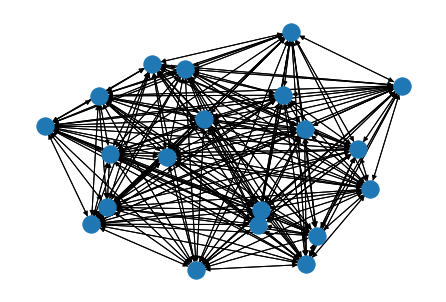

In [12]:

G0 = nx.complete_graph(20, nx.DiGraph())

for (u, v) in G0.edges():
          G0.edges[u,v]['weight'] = np.random.randint(1,1000)

   
nx.draw(G0)
G = nx.convert_matrix.to_numpy_array(G0)

for i in range(len(G)):
    G[i][i] = np.inf

ant_colony = AntColony(G, 100, 10, 100, 0.95, alpha=1, beta=1)
shortest_path = ant_colony.run()
print (f"shortest_path: {shortest_path}")

#Comparaison 
shortest_path_dijkstra = shortest_path_d(G0,0,19,'weight')
print(f"\nshortest path with Dijkstra is : {shortest_path_dijkstra}")
pathGraph = nx.path_graph(shortest_path_dijkstra)  # does not pass edges attributes

# Read attributes from each edge
for ea in pathGraph.edges():
    #print from_node, to_node, edge's attributes
    print(ea, G0.edges[ea[0], ea[1]])


### REFERENCES :

https://github.com/Akavall/AntColonyOptimization/blob/master/example.py